In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import tensorflow as tf

# Load preprocessed data
mnist_train_data = np.load('/content/drive/MyDrive/HW14/mnist_train_data.npy')
mnist_train_label = np.load('/content/drive/MyDrive/HW14/mnist_train_label.npy')

mnist_test_data = np.load('/content/drive/MyDrive/HW14/mnist_test_data.npy')
mnist_test_label = np.load('/content/drive/MyDrive/HW14/mnist_test_label.npy')

svhn_train_data = np.load('/content/drive/MyDrive/HW14/svhn_train_data.npy')
svhn_train_label = np.load('/content/drive/MyDrive/HW14/svhn_train_label.npy')

svhn_test_data = np.load('/content/drive/MyDrive/HW14/svhn_test_data.npy')
svhn_test_label = np.load('/content/drive/MyDrive/HW14/svhn_test_label.npy')

In [3]:
model_no_lll = tf.keras.Sequential([
                                    tf.keras.Input(shape=(28, 28, 1)),

                                    tf.keras.layers.Conv2D(8, 3, strides=1, padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LeakyReLU(),

                                    tf.keras.layers.Conv2D(16, 3, strides=1, padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LeakyReLU(),

                                    tf.keras.layers.Conv2D(32, 3, strides=1, padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LeakyReLU(),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(10, activation='softmax')
])
model_no_lll.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [4]:
no_lll_table = np.zeros(shape=(3, 2))
cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy()

# Results for random initilization
no_lll_table[0, 0] = cross_entropy(mnist_test_label, model_no_lll(mnist_test_data, training=True)).numpy()
no_lll_table[0, 1] = cross_entropy(svhn_test_label, model_no_lll(svhn_test_data, training=True)).numpy()

In [5]:
# Train on task 1 (MNIST)
model_no_lll.fit(x=mnist_train_data, y=mnist_train_label, epochs=10)

no_lll_table[1, 0] = cross_entropy(mnist_test_label, model_no_lll(mnist_test_data, training=True)).numpy()
no_lll_table[1, 1] = cross_entropy(svhn_test_label, model_no_lll(svhn_test_data, training=True)).numpy()

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.4766
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1007
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0694
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0528
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0406
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0351
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0298
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0207
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0214
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0166


In [6]:
# Train on task 2 (SVHN)
model_no_lll.fit(x=svhn_train_data, y=svhn_train_label, epochs=10)

no_lll_table[2, 0] = cross_entropy(mnist_test_label, model_no_lll(mnist_test_data, training=True)).numpy()
no_lll_table[2, 1] = cross_entropy(svhn_test_label, model_no_lll(svhn_test_data, training=True)).numpy()

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7082
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4810
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4316
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4011
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3751
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3499
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3286
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3100
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2936
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2789


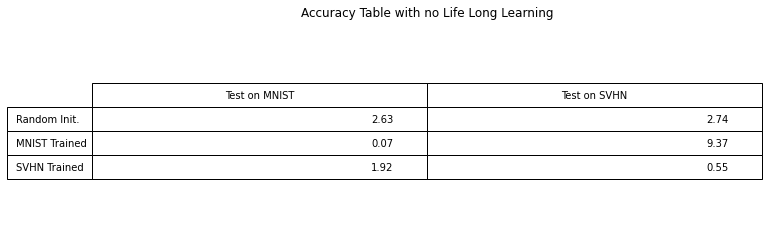

In [7]:
import matplotlib.pyplot as plt

no_lll_table = np.around(no_lll_table, decimals=2)

columns = ('Test on MNIST', 'Test on SVHN')
rows = ('Random Init.', 'MNIST Trained', 'SVHN Trained')

no_lll = plt.table(cellText=no_lll_table, rowLabels=rows, colLabels=columns,  loc='center')
plt.title('Accuracy Table with no Life Long Learning')
plt.box(on=None)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

no_lll.scale(2, 2)
plt.show()

In [66]:
# Apply EWC
model_ewc = tf.keras.Sequential([
                                    tf.keras.Input(shape=(28, 28, 1)),

                                    tf.keras.layers.Conv2D(8, 3, strides=1, padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LeakyReLU(),

                                    tf.keras.layers.Conv2D(16, 3, strides=1, padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LeakyReLU(),

                                    tf.keras.layers.Conv2D(32, 3, strides=1, padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LeakyReLU(),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(10, activation='softmax')
])
model_ewc.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [67]:
ewc_table = np.zeros(shape=(3, 2))
cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy()

# Results for random initilization
ewc_table[0, 0] = cross_entropy(mnist_test_label, model_ewc(mnist_test_data, training=True)).numpy()
ewc_table[0, 1] = cross_entropy(svhn_test_label, model_ewc(svhn_test_data, training=True)).numpy()

In [68]:
# Train the 1st task (MNIST)
model_ewc.fit(x=mnist_train_data, y=mnist_train_label, epochs=10)

ewc_table[1, 0] = cross_entropy(mnist_test_label, model_ewc(mnist_test_data, training=True)).numpy()
ewc_table[1, 1] = cross_entropy(svhn_test_label, model_ewc(svhn_test_data, training=True)).numpy()

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5020
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1064
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0725
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0548
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0435
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0346
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0292
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0234
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0220
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0183


In [69]:
# Calculate guard parameters for the second task 
task1_variables = model_ewc.trainable_variables.copy()

with tf.GradientTape() as tape:
  losses = tf.math.log(model_ewc(mnist_train_data[:10000], training=True))

task1_gradient = tape.gradient(losses, model_ewc.trainable_variables)

In [70]:
guard = [0] * len(task1_gradient)
for i in range(len(task1_gradient)):
  print(tf.shape(task1_gradient[i]))

tf.Tensor([3 3 1 8], shape=(4,), dtype=int32)
tf.Tensor([8], shape=(1,), dtype=int32)
tf.Tensor([8], shape=(1,), dtype=int32)
tf.Tensor([8], shape=(1,), dtype=int32)
tf.Tensor([ 3  3  8 16], shape=(4,), dtype=int32)
tf.Tensor([16], shape=(1,), dtype=int32)
tf.Tensor([16], shape=(1,), dtype=int32)
tf.Tensor([16], shape=(1,), dtype=int32)
tf.Tensor([ 3  3 16 32], shape=(4,), dtype=int32)
tf.Tensor([32], shape=(1,), dtype=int32)
tf.Tensor([32], shape=(1,), dtype=int32)
tf.Tensor([32], shape=(1,), dtype=int32)
tf.Tensor([25088    10], shape=(2,), dtype=int32)
tf.Tensor([10], shape=(1,), dtype=int32)


In [71]:
for i in range(len(guard)):
  task1_gradient[i] = task1_gradient[i] / 10000.
  guard[i] = task1_gradient[i] ** 2

In [72]:
# Train the model for the 2nd task
epochs = 10
ewc_optimizer = tf.keras.optimizers.Adam()

for i in range(10):
  print('Current epoch is '+str(i))
  for j in range(500):
    x = svhn_train_data[j*100:100*(j+1), :, :, :]
    y = svhn_train_label[j*100:100*(j+1)]

    with tf.GradientTape() as tape:
      loss_function = cross_entropy(y, model_ewc(x, training=True))
      for k in range(len(guard)):
        loss_function += tf.reduce_sum(50 * guard[k] * (model_ewc.trainable_variables[k] - task1_variables[k]) ** 2)
    
    gradients = tape.gradient(loss_function, model_ewc.trainable_variables)
    ewc_optimizer.apply_gradients(zip(gradients, model_ewc.trainable_variables))

Current epoch is 0
Current epoch is 1
Current epoch is 2
Current epoch is 3
Current epoch is 4
Current epoch is 5
Current epoch is 6
Current epoch is 7
Current epoch is 8
Current epoch is 9


In [73]:
# Add results for the 2nd task
ewc_table[2, 0] = cross_entropy(mnist_test_label, model_ewc(mnist_test_data, training=True)).numpy()
ewc_table[2, 1] = cross_entropy(svhn_test_label, model_ewc(svhn_test_data, training=True)).numpy()

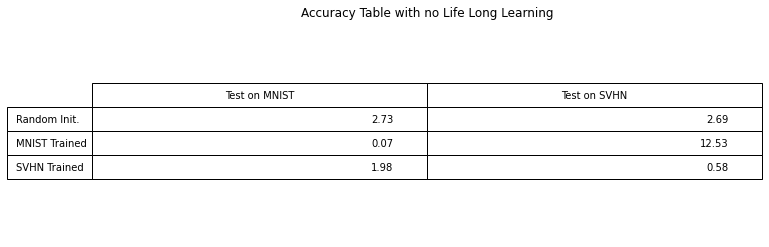

In [74]:
# Show EWC table
ewc_table = np.around(ewc_table, decimals=2)

ewc = plt.table(cellText=ewc_table, rowLabels=rows, colLabels=columns,  loc='center')
plt.title('Accuracy Table with no Life Long Learning')
plt.box(on=None)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ewc.scale(2, 2)
plt.show()